In [14]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import plotly.express as px
from umap import UMAP

In [15]:
airline_sentiments = pd.read_csv('airline_sentiments.csv')

airline_sentiments

,Unnamed: 0,text,airline_sentiment
0,0,@VirginAmerica What @dhepburn said.,neutral
1,1,@VirginAmerica plus you've added commercials t...,positive
2,2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,3,@VirginAmerica it's really aggressive to blast...,negative
4,4,@VirginAmerica and it's a really big bad thing...,negative
...,...,...,...
14635,14635,@AmericanAir thank you we got on a different f...,positive
14636,14636,@AmericanAir leaving over 20 minutes Late Flig...,negative
14637,14637,@AmericanAir Please bring American Airlines to...,neutral
14638,14638,"@AmericanAir you have my money, you change my ...",negative


In [16]:
model_VADER = SentimentIntensityAnalyzer()

In [17]:
def get_VADER_sentiment(text, polar=['neg', 'neu', 'pos']):
    return model_VADER.polarity_scores(text)[polar]

In [18]:
airline_sentiments['VADER_negativity'] = airline_sentiments['text'].apply(lambda x: get_VADER_sentiment(x, 'neg'))
airline_sentiments['VADER_neutrality'] = airline_sentiments['text'].apply(lambda x: get_VADER_sentiment(x, 'neu'))
airline_sentiments['VADER_positivity'] = airline_sentiments['text'].apply(lambda x: get_VADER_sentiment(x, 'pos'))

airline_sentiments

,Unnamed: 0,text,airline_sentiment,VADER_negativity,VADER_neutrality,VADER_positivity
0,0,@VirginAmerica What @dhepburn said.,neutral,0.000,1.000,0.000
1,1,@VirginAmerica plus you've added commercials t...,positive,0.000,1.000,0.000
2,2,@VirginAmerica I didn't today... Must mean I n...,neutral,0.000,1.000,0.000
3,3,@VirginAmerica it's really aggressive to blast...,negative,0.226,0.645,0.129
4,4,@VirginAmerica and it's a really big bad thing...,negative,0.296,0.704,0.000
...,...,...,...,...,...,...
14635,14635,@AmericanAir thank you we got on a different f...,positive,0.000,0.800,0.200
14636,14636,@AmericanAir leaving over 20 minutes Late Flig...,negative,0.136,0.793,0.071
14637,14637,@AmericanAir Please bring American Airlines to...,neutral,0.000,0.723,0.277
14638,14638,"@AmericanAir you have my money, you change my ...",negative,0.000,0.871,0.129


In [19]:
def clean_text(text, lowercase=True, rm_nums=True, rm_puncs=True, rm_special_chars=True, normalize_repeated_chars=True, lemmatize_eng=True, stem_bahasa=False, stem_eng=False, rm_stop_words_english=True):
    # Convert to lowercase
    if lowercase:
        text = text.lower()

    # Remove numbers
    if rm_nums:
        text = re.sub(r"\d+", "", text)

    # Remove punctuation
    if rm_puncs:
        text = re.sub(r"[^\w\s]", "", text)

    # Remove special characters
    if rm_special_chars:
        text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Remove all special characters

    # Normalize repeated words:
    if normalize_repeated_chars:
        text = re.sub(r'(.)\1+', r'\1', text)

    # English lemmatization
    if lemmatize_eng:
        lemmatizer = WordNetLemmatizer()
        text = lemmatizer.lemmatize(text)

    # Egnlish stemming
    if stem_eng:
        stemmer = PorterStemmer()
        text = stemmer.stem(text)
    
    # Bahasa stemming    
    if stem_bahasa:
        stemmer = StemmerFactory().create_stemmer()
        text = stemmer.stem(text)

    # Remove whitespaces
    text = re.sub(r'\s+', ' ', text)
        
    # Remove stop words
    if rm_stop_words_english:
        stop_words = set(stopwords.words("english"))
        words = text.split()
        words_no_stopwords = [word for word in words if word not in stop_words]
        text = " ".join(words_no_stopwords)
    
    return text

In [20]:
airline_sentiments['text'] = airline_sentiments['text'].apply(lambda x: clean_text(x))

airline_sentiments

,Unnamed: 0,text,airline_sentiment,VADER_negativity,VADER_neutrality,VADER_positivity
0,0,virginamerica dhepburn said,neutral,0.000,1.000,0.000
1,1,virginamerica plus youve aded comercials exper...,positive,0.000,1.000,0.000
2,2,virginamerica didnt today must mean ned take a...,neutral,0.000,1.000,0.000
3,3,virginamerica realy agresive blast obnoxious e...,negative,0.226,0.645,0.129
4,4,virginamerica realy big bad thing,negative,0.296,0.704,0.000
...,...,...,...,...,...,...
14635,14635,americanair thank got diferent flight chicago,positive,0.000,0.800,0.200
14636,14636,americanair leaving minutes late flight warnin...,negative,0.136,0.793,0.071
14637,14637,americanair please bring american airlines bla...,neutral,0.000,0.723,0.277
14638,14638,americanair money change flight dont answer ph...,negative,0.000,0.871,0.129


## Clustering:

### Text vectorization:

In [21]:
def vectorize_texts(texts, as_df=False):
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
    
    if format:
        features = tfidf_vectorizer.get_feature_names_out()
        return pd.DataFrame(tfidf_matrix.toarray(), columns=features)
    
    return tfidf_matrix

### K-Means:

In [22]:
model_KMeans = KMeans(n_clusters=2, random_state=5)
model_KMeans.fit(vectorize_texts(airline_sentiments['text']))

airline_sentiments['KMEANS'] = model_KMeans.labels_

In [23]:
airline_sentiments.KMEANS.unique()

array([0, 1], dtype=int32)

In [28]:
df = px.data.iris()

features = df.loc[:, :'petal_width']

umap_2d = UMAP(n_components=2, init= 'random', random_state=5)

proj_2d = umap_2d.fit_transform(features)

fig_2d = px.scatter(proj_2d, x=0, y=1, color=df.species, labels={'color': 'species'})

fig_2d.show()

/Users/azardian/anaconda3/envs/data-science_and_ai/lib/python3.10/site-packages/umap/umap_.py:1945: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

In [12]:
import sys
print(sys.executable)

/Users/azardian/anaconda3/envs/data-science_and_ai/bin/python


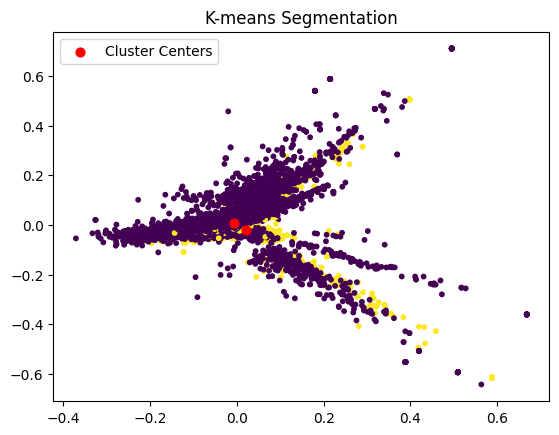

In [134]:
# Use PCA to reduce to 2D for plotting
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(tfidf_matrix.toarray())

# Create a scatter plot of the clusters
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], s=10, c=airline_sentiments['KMEANS'], cmap='viridis')

# Plot cluster centers
cluster_centers = pca.transform(model_KMeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=40, c='red', label='Cluster Centers')

plt.xlabel(None)
plt.ylabel(None)
plt.title('K-means Segmentation')
plt.legend()
plt.show()

In [113]:
dbscan = DBSCAN(eps=0.2, min_samples=2)
dbscan.fit(vectorize_texts(airline_sentiments['text']))

airline_sentiments['DBSCAN'] = dbscan.labels_

In [115]:
airline_sentiments.DBSCAN.unique()

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17